In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from collections import Counter

### G-M tube high coltage

In [3]:
#the amplitude, counting rate and background noise
A = np.array([0.440,0.586,0.624,0.728,0.808,0.952,1.002])
R = np.array([0.02,10.7,11.3,11.7,12.3,12.2,12.2])
N = np.array([0,.25,.37,.33,.46,.57,.53])

mean: 10.06
standard deviation: 4.1337495950148835
error on the mean: 2.847980952380952


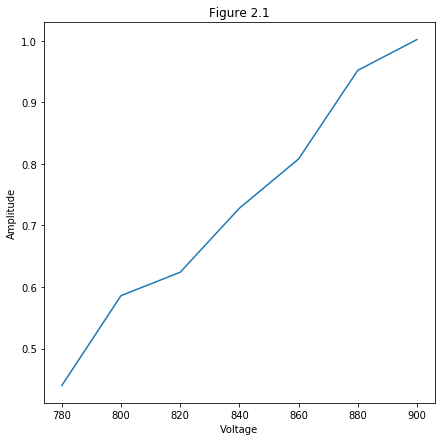

In [4]:
mean = np.mean(R)
sd = np.std(R)
error_on_mean = (sd**2)/6
print("mean:",mean)
print("standard deviation:",sd)
print("error on the mean:", error_on_mean)

fig = plt.figure(figsize=(7,7))
#set the voltage from 780V to 900V
V=np.linspace(780,900,7)
plt.plot(V,A)

plt.title('Figure 2.1')
plt.xlabel('Voltage')
plt.ylabel('Amplitude')

plt.savefig("Amplitude_voltage.png")

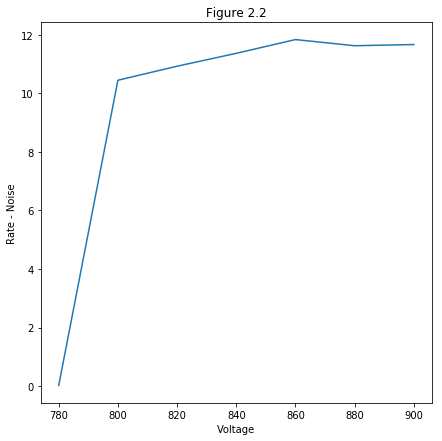

In [5]:
#voltage vs rate
fig = plt.figure(figsize=(7,7))
plt.plot(V,R-N)
plt.title('Figure 2.2')
plt.xlabel('Voltage')
plt.ylabel('Rate - Noise')
plt.savefig("Voltage_rate.png")

## Frequency Distribution

In [6]:
#import the measured 100 rates
Rate = np.array([13,9,10,12,5,6,7,13,16,11,6,11,9,8,10,11,13,12,10,12,9,7,8,14,8,7,9,8,9,12,8,7,15,11,10,9,8,14,9,12,9,11,9,15,14,10,11,12,9,
              5,12,13,19,11,10,16,14,13,16,11,8,10,11,4,9,16,10,8,12,13,10,9,12,12,10,19,9,12,13,11,12,14,15,11,15,6,11,5,7,14,8,13,18,10,9
              ,12,11,12,14,10])
counts_of_rates = dict(Counter(sorted(Rate,key=int)))
print(counts_of_rates)
ratecounts = np.array([1,3,3,5,9,14,12,13,14,8,7,4,4,1,2])
print(ratecounts)

{4: 1, 5: 3, 6: 3, 7: 5, 8: 9, 9: 14, 10: 12, 11: 13, 12: 14, 13: 8, 14: 7, 15: 4, 16: 4, 18: 1, 19: 2}
[ 1  3  3  5  9 14 12 13 14  8  7  4  4  1  2]


In [7]:
#caculate the mean of the rates
m = np.mean(Rate)
print("mean:",m)

mean: 10.83


In [8]:
#define a function of factorial
def fac(x):
    x = np.zeros(15)
    x[:] = np.linspace(4,19,15)
    fac = factorial(n,exact=False)
    return fac

In [9]:
#define the function for poission distribution
def P(n):
    return ((m**n)*(np.exp(-m)))/fac(n)

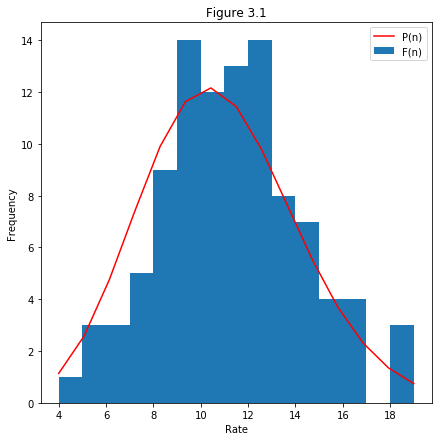

In [10]:
#plot the histgram and poission distribution
plt.figure(figsize=(7,7))
plt.hist(Rate,bins=15,label="F(n)")
n = np.linspace(4,19,15)
plt.plot(n,100*P(n),color="red",label="P(n)")
plt.legend()
plt.title('Figure 3.1')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.savefig("Poission_of_counting.png")

In [11]:
ratecounts - 100*P(n)

array([-0.13473211,  0.42173075, -1.76393821, -2.40233238, -0.90891765,
        2.36253292, -0.16344536,  1.5555674 ,  4.21513825,  0.33785491,
        1.46808087,  0.296458  ,  1.68935414, -0.3493233 ,  1.25965045])

In [12]:
#define function for X^2
chi_square = np.sum((ratecounts-100*P(n))**2/(100*P(n)))
print('chi_square:',chi_square)
print("confindence level:",0.9235)

chi_square: 8.007176844614612
confindence level: 0.9235


## Absorbation of gamma ray by lead

In [13]:
#import the data
#x in density times thickness
x = np.array([30.71,26.89,22.52,18.59,13.88,7.41,2.74])
#intensity = rate
I = np.array([673/831,555/501,700/479,728/428,1120/401,1003/187,999/114])
#I not
I0 = 8.517
#background intensity = bacrate*1000
BI = 0.451
#the total error of measured and bacground, sqrt(sigmai^2+sigmab^2)
yerr = np.array([0.0459,0.0578,0.0646,0.0714,0.0900,0.1727,0.2793])

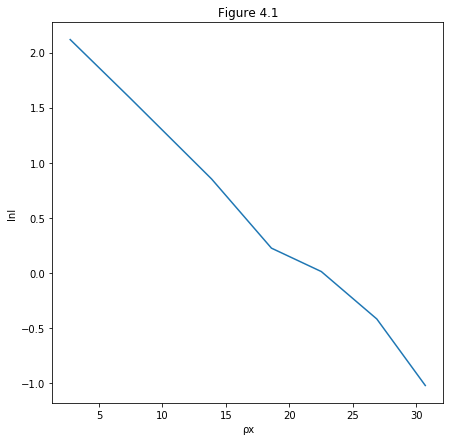

In [14]:
#show that x and ln(I) have liner relationship
plt.figure(figsize=(7,7))
plt.plot(x,np.log(I-BI))
plt.title('Figure 4.1')
plt.xlabel('ρx')
plt.ylabel('lnI')
plt.savefig("linear_relation.png")

In [15]:
#the model functiuon is ux+b
def func(x,u,b):
    return u*x + b
    
#liner I is ln(I-BI)
lnI = np.log(I-BI)
#the liner error is error over I
lin_yerr = yerr/(I-BI)

#define the terms needed to find u,b and find u,b
wi = 1/(lin_yerr)**2
W = np.sum(wi)
X_1 = np.sum(wi*x)
Y_1 = np.sum(wi*lnI)
X_2 = np.sum(wi*x**2)
Y_2 = np.sum(wi*lnI**2)
P = np.sum(wi*x*lnI)
delta = (W*X_2 - X_1**2)

u = (W*P - X_1*Y_1) / delta
b = (X_2*Y_1 - X_1*P) / delta

mass absorption coefficient: 0.11020731702102064


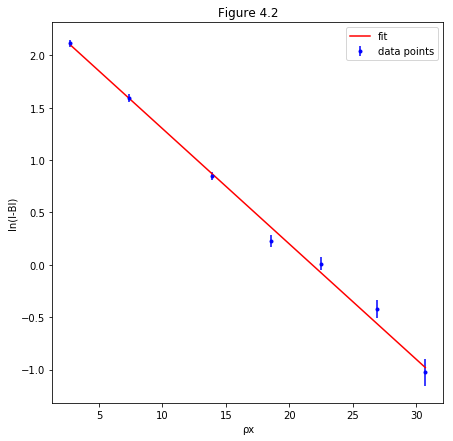

In [16]:
#plot the data points and fitting line
plt.figure(figsize=(7,7))

plt.errorbar(x,lnI,lin_yerr,fmt=".",color="blue",label="data points")
plt.plot(x, func(x,u,b) ,color="red",label="fit")
plt.legend()
plt.title('Figure 4.2')
plt.xlabel('ρx')
plt.ylabel('ln(I-BI)')
plt.savefig("line_fitting.png")
print("mass absorption coefficient:",-u)

In [ ]:
# caculate the chi-square
chi_square = np.sum((lnI - func(x,u,b))**2/lin_yerr**2)
degree_freedom = 7-2
normalized_chisqr = chi_square/degree_freedom
print("chi-square:",chi_square)
print("normalized chi-square:", normalized_chisqr)
print("confindence level:",0.06289)

In [ ]:
from sympy.solvers import solve
from sympy import Symbol
z = Symbol('z')
w = solve(np.sum((lnI - func(x,z,b))**2/lin_yerr**2)-11.473266437659785,z)
print("uncertanity on u:", w-u)